In [12]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [13]:
%config InlineBackend.figure_format = 'retina'

In [14]:
file = glob.glob('./data/*.csv')
file

['./data/olist_sellers_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/olist_orders_dataset.csv',
 './data/olist_order_items_dataset.csv',
 './data/olist_customers_dataset.csv',
 './data/olist_geolocation_dataset.csv',
 './data/olist_order_payments_dataset.csv',
 './data/olist_order_reviews_dataset.csv',
 './data/olist_products_dataset.csv']

In [15]:
seller_data = pd.read_csv(file[0])
product_category = pd.read_csv(file[1])
orders_data  = pd.read_csv(file[2])
items_data = pd.read_csv(file[3])
customer_data = pd.read_csv(file[4])
geolocation_data = pd.read_csv(file[5])
payments_data = pd.read_csv(file[6])
reviews_data  = pd.read_csv(file[7])
prodcuts_data = pd.read_csv(file[8])

In [16]:
reviews_df = reviews_data[["order_id","review_score"]]
orders_df = orders_data[["order_id","customer_id", "order_purchase_timestamp", "order_estimated_delivery_date"]]
items_df = items_data[["order_id","price","freight_value"]]

In [17]:
reviews_orders = pd.merge(orders_df, reviews_df, on = "order_id", how ="outer")

In [18]:
iro_df = pd.merge(items_df, reviews_orders, on = "order_id", how="outer")


In [19]:
iro_df["order_purchase_date"] = pd.to_datetime(iro_df["order_purchase_timestamp"])
iro_df["order_delivery_date"] = pd.to_datetime(iro_df["order_estimated_delivery_date"])

In [20]:
iro_df["delivery_period"] = iro_df["order_delivery_date"]-iro_df["order_purchase_date"]

In [21]:
iro_df["purchase_date"] = iro_df["order_purchase_date"].dt.strftime('%Y/%m/%d')

In [22]:
iro_df = iro_df.drop(columns = ["order_purchase_timestamp","order_estimated_delivery_date","order_purchase_date","order_delivery_date"])
iro_df["delivery_period"] = iro_df["delivery_period"].dt.days

In [23]:
customer_unique = iro_df["customer_id"].unique()
customer_unique = customer_unique.tolist()

In [24]:
def customer_id (customer_id, customer_unique):
    num = 1
    for i in (customer_unique):
        if customer_id == i:
            return f"id_{num}"
        num += 1

In [25]:
iro_df["customer_id"] = iro_df["customer_id"].apply(lambda x: customer_id(x, customer_unique))

In [26]:
iro_dfg2 = iro_df.groupby(by = ["customer_id"]).mean()

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_86334/1896178995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iro_dfg2 = iro_df.groupby(by = ["customer_id"]).mean()


In [31]:
iro_dfg2

,price,freight_value,review_score,delivery_period
customer_id,,,,
id_1,58.90,13.29,5.0,15.0
id_10,53.99,11.40,4.0,20.0
id_100,14.00,50.85,5.0,26.0
id_1000,119.99,12.04,5.0,10.0
id_10000,169.90,12.39,4.0,14.0
...,...,...,...,...
id_9995,27.99,7.46,4.0,2.0
id_9996,103.97,25.04,4.0,20.0
id_9997,89.18,12.96,1.0,24.0


In [33]:
count = pd.DataFrame(iro_df["customer_id"].value_counts())
count = count.rename(columns= {"customer_id":'구매횟수'})
count

,구매횟수
id_34717,22
id_50138,21
id_10460,20
id_65716,20
id_25584,15
...,...
id_35001,1
id_35000,1
id_34999,1
id_34998,1


In [34]:
iro_dfgj = iro_dfg2.join(count, how = 'outer').sort_values("구매횟수", ascending = False)

In [35]:
iro_dfgj

,price,freight_value,review_score,delivery_period,구매횟수
id_34717,65.007273,12.623636,1.0,16.0,22
id_50138,1.514286,7.827143,1.0,11.0,21
id_65716,98.700000,14.440000,NaN,28.0,20
id_10460,100.000000,10.120000,1.0,13.0,20
id_60942,51.000000,1.200000,5.0,35.0,15
...,...,...,...,...,...
id_41513,399.000000,29.740000,4.0,15.0,1
id_41512,199.000000,32.140000,4.0,21.0,1
id_41511,32.640000,10.960000,5.0,27.0,1
id_41510,95.000000,13.330000,5.0,17.0,1


<AxesSubplot: xlabel='구매횟수', ylabel='review_score'>

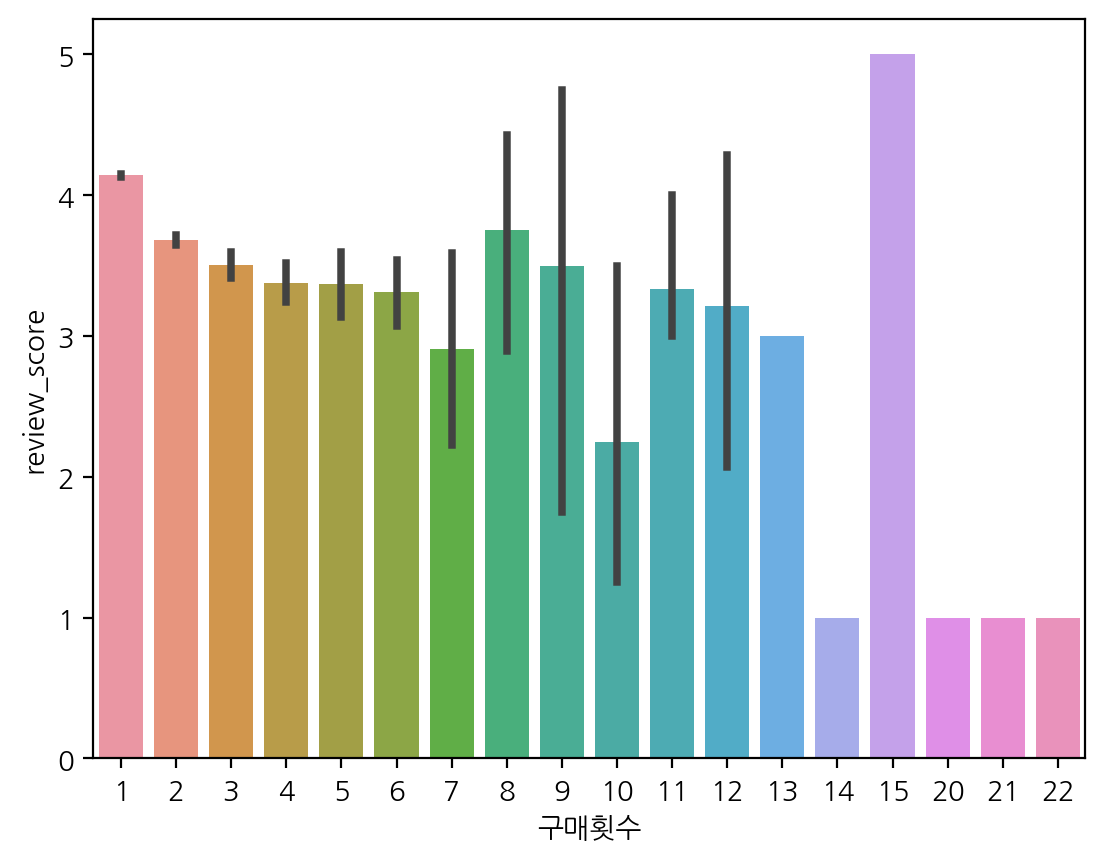

In [36]:
sns.barplot(data = iro_dfgj, x = '구매횟수', y ="review_score")